In [1]:
!mkdir -p ~/.kaggle
import json 
token = {"username":"seunghwan1228","key":"0f6351758ad29d87352cba99de319590"}
with open('/content/drive/My Drive/Colab Notebooks/Kaggle Kernel/kaggle.json', 'w') as file:
  json.dump(token, file)
  
!cp drive/'My Drive'/'Colab Notebooks'/'Kaggle Kernel'/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

# !kaggle competitions download -c aptos2019-blindness-detection

kaggle.json
total 4
-rw------- 1 root root 72 Feb 23 10:16 kaggle.json
{"username": "seunghwan1228", "key": "0f6351758ad29d87352cba99de319590"}

In [10]:
!kaggle datasets list -s cat

ref                                                          title                                               size  lastUpdated          downloadCount  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
crawford/cat-dataset                                         Cat Dataset                                          4GB  2018-02-16 23:41:25           8888  
tongpython/cat-and-dog                                       Cat and Dog                                        218MB  2018-04-26 10:56:50          15171  
rmisra/news-category-dataset                                 News Category Dataset                               25MB  2018-12-02 04:09:45          10356  
harriken/bias-media-cat                                      Bias Media CAT                                      17MB  2017-10-27 22:46:25            321  
mrisdal/open-exoplanet-catalogue                             Ope

In [11]:
!kaggle datasets download crawford/cat-dataset 

100% 4.02G/4.04G [01:19<00:00, 30.3MB/s]
100% 4.04G/4.04G [01:20<00:00, 54.2MB/s]


In [12]:
!unzip cat-dataset.zip -d /data/

Streaming output truncated to the last 5000 lines.
  inflating: /data/cats/CAT_05/00001130_020.jpg.cat  
  inflating: /data/cats/CAT_05/00001130_023.jpg  
  inflating: /data/cats/CAT_05/00001130_023.jpg.cat  
  inflating: /data/cats/CAT_05/00001130_026.jpg  
  inflating: /data/cats/CAT_05/00001130_026.jpg.cat  
  inflating: /data/cats/CAT_05/00001131_003.jpg  
  inflating: /data/cats/CAT_05/00001131_003.jpg.cat  
  inflating: /data/cats/CAT_05/00001131_026.jpg  
  inflating: /data/cats/CAT_05/00001131_026.jpg.cat  
  inflating: /data/cats/CAT_05/00001132_007.jpg  
  inflating: /data/cats/CAT_05/00001132_007.jpg.cat  
  inflating: /data/cats/CAT_05/00001132_008.jpg  
  inflating: /data/cats/CAT_05/00001132_008.jpg.cat  
  inflating: /data/cats/CAT_05/00001132_014.jpg  
  inflating: /data/cats/CAT_05/00001132_014.jpg.cat  
  inflating: /data/cats/CAT_05/00001132_017.jpg  
  inflating: /data/cats/CAT_05/00001132_017.jpg.cat  
  inflating: /data/cats/CAT_05/00001132_018.jpg  
  inflating: 

In [0]:
%tensorflow_version 2.x

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import imgaug 
import imgaug.augmenters as iaa
import re
import cv2

In [0]:
test_data = '/data/CAT_00/00000001_000.jpg'

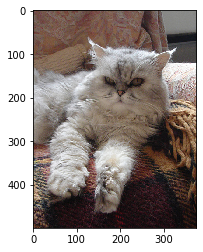

In [18]:
cat_img = plt.imread(test_data)
plt.imshow(cat_img)

In [0]:
class hyperparam:
  data_path = '/data/CAT_06'
  img_size = (225,225)
  batch_size = 10

hp = hyperparam()

In [0]:
def __data_selector(img_data_path):
  dataset = []
  for f in os.listdir(img_data_path):  
    img_data_path = os.path.join(hp.data_path, f)
    if '.cat' in f:
      base_name = os.path.basename(f) # 
      convert_name = re.sub('.cat', '', base_name)
      os.system(f"mv {hp.data_path}/{base_name} {hp.data_path}/{convert_name}")


In [0]:
__data_selector(hp.data_path)

In [0]:
os.listdir(hp.data_path)

In [0]:
class cat_generator(tf.keras.utils.Sequence):
  def __init__(self, img_data_path, batch_size, target_img_size, n_channel, augmentation):
    self.img_data_path = img_data_path
    self.batch_size = batch_size
    self.target_img_size = target_img_size
    self.n_channel = n_channel
    self.augmentation = augmentation
    self.on_epoch_end()

  def load_data(self, img_data_path):
    x = np.zeros(shape=(self.batch_size, *self.target_img_size, self.n_channel))
    for n, img in enumerate(os.listdir(img_data_path)):
      if '.cat' not in img:
        x[n] = plt.imread(hp.data_path +'/' + img)
    return x

  def __len__(self):
    return int(np.ceil(len(self.img_data_path) / self.batch_size))

  def on_epoch_end(self):
    self.indexes = np.arange(len(self.img_data_path))

  def __getitem__(self, index):
    batch_index = self.indexes[index * self.batch_size : (index+1)*self.batch_size]
    
    self.result = self.load_data(self.img_data_path)
    self.result = self.__preprocess_image(self.result)
    self.result = self.__resize(self.result)

    if self.augmentation:
      self.result = self.__augmentator(self.result) 

    batch_data = np.array([self.result[k] for k in indexes])
    return batch_data

  def __resize(self, img_data_path, target_img_size):
    self.img_data_path = cv2.resize(self.img_data_path, size=self.target_img_size)  # resize
    self.img_data_path = cv2.cvtColor(self.img_data_path, cv2.COLOR_BGR2RGB) # convert color
  
  def __preprocess_image(self, img_data_path):
    self.img_data_path = plt.imread(self.img_data_path)
    return (self.img_data_path - 127.5) / 127.5

  def __augmentator(self, image):
    sometimes = lambda aug : iaa.Sometimes(0.5, aug)

    seq = iaa.Sequential([iaa.Fliplr(0.5),
                          iaa.Flipud(0.3),
                          iaa.Affine(scale=(0.5, 1.2),
                                     translate_percent={'x':(-0.2, 0.2), 'y':(-0.2, 0.2)},
                                     rotation=(-45,45),
                                     shear=(-10, 10))
                          ], random_order = True)
    return seq.augment_image(image) 

In [0]:
img_generator = cat_generator(hp.data_path, 10, hp.img_size, 3, augmentation=False)

In [142]:
next(iter(img_generator))

ValueError: ignored

In [137]:
plt.imshow(plt.imread('/data/CAT_02/00000673_012.jpg'))

OSError: ignored